In [1]:
import fastbook
fastbook.setup_book()

c:\Users\sande\anaconda3\envs\local\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\Users\sande\anaconda3\envs\local\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import nltk 
import numpy as np 
from sklearn import decomposition
from scipy import linalg
from IPython.display import display
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [4]:
from sklearn.datasets import fetch_20newsgroups

In [5]:
categories = ["alt.atheism", "talk.religion.misc", "comp.graphics", "sci.space"]
remove = ("headers", "footers", "quotes")
newsgroups_train = fetch_20newsgroups(subset="train", categories= categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset="test", categories= categories, remove=remove)

f"Shape of Training Data {newsgroups_train.filenames.shape}", f"Shape of Testing Data {newsgroups_test.filenames.shape}"

('Shape of Training Data (2034,)', 'Shape of Testing Data (1353,)')

In [6]:
print("\n".join(newsgroups_train.data[:4]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

In [8]:
from sklearn.feature_extraction import _stop_words
sorted(list(_stop_words.ENGLISH_STOP_WORDS))[:10]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost']

In [9]:
from nltk import stem

wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

wordlist = ["organize", "organizes", "orginizing"]
display([wnl.lemmatize(word) for word in wordlist])
display([porter.stem(word) for word in wordlist])

['organize', 'organizes', 'orginizing']

['organ', 'organ', 'orgin']

In [17]:
vectorizer = CountVectorizer(stop_words="english")
vectors = vectorizer.fit_transform(newsgroups_train.data).todense()
vocab = np.array(vectorizer.get_feature_names_out())

f"Shape of vecotrs is {vectors.shape}", f"Shape of vocab is {vocab.shape}"

('Shape of vecotrs is (2034, 26576)', 'Shape of vocab is (26576,)')

In [18]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

display(U.shape, s.shape, Vh.shape)

CPU times: total: 1min 36s
Wall time: 48.1 s


(2034, 2034)

(2034,)

(2034, 26576)

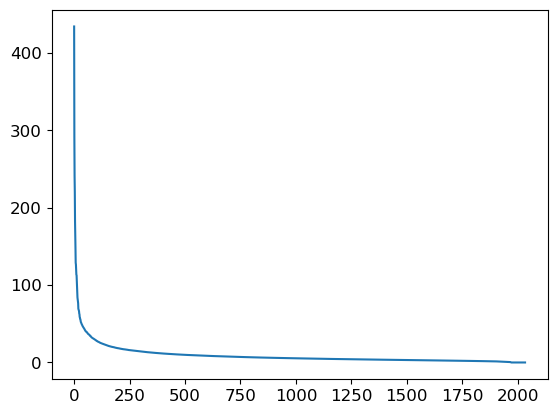

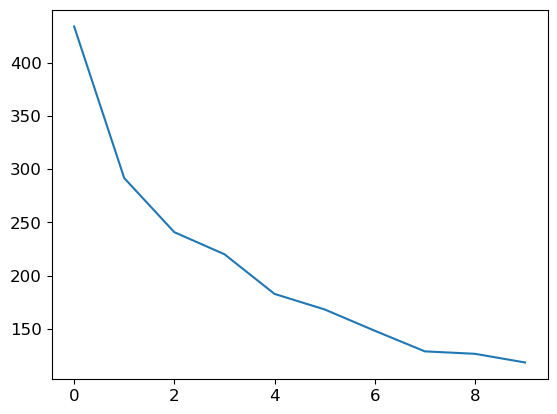

In [19]:
plt.plot(s)
plt.figure()

plt.plot(s[:10])

In [20]:
num_words = 10
def show_topics(a):
    top_words = lambda x: [vocab[i] for i in np.argsort(x)[:-num_words-1:-1]]
    topic_words = [top_words(b) for b in a]
    return [" ".join(t) for t in topic_words]

show_topics(Vh[:10])

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative salvadorans ahhh',
 'jpeg gif file color quality image jfif format bit version',
 'graphics edu pub mail 128 3d ray ftp send image',
 'jesus god matthew people atheists atheism does graphics religious said',
 'image data processing analysis software available tools display tool user',
 'god atheists atheism religious believe religion argument true atheist example',
 'space nasa lunar mars probe moon missions probes surface earth',
 'image probe surface lunar mars probes moon orbit mariner mission',
 'argument fallacy conclusion example true ad argumentum premises false valid',
 'space larson image theory universe physical nasa material star unified']

In [21]:
num = 5

clf = decomposition.NMF(n_components=num, random_state=1)
W1 = clf.fit_transform(vectors)
H1 = clf.components_

show_topics(H1)

TypeError: np.matrix is not supported. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html